> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`, 
* `title` - `str`, 
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`. 

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [1]:
#### Escreva sua resposta aqui
from enum import Enum
from dataclasses import dataclass, field
from typing import Optional, Any

class BiteLevel(Enum):
    Beginner = "Beginner"
    Intermediate = "Intermediate"
    Advanced = "Advanced"

@dataclass(init=True, order=True)
class Bite:
    number: int = field(compare=True)
    title: str = field(compare=False)
    level: Optional[BiteLevel] = field(compare=False, default=BiteLevel.Beginner)

    def __str__(self):
        return f"{self.number} - {self.title} ({self.level.value})"

In [2]:
### Teste de Classes

bites = []
bites.append(Bite(154, "Escreva uma dataclass", BiteLevel["Intermediate"]))
bites.append(Bite(1, "Some n valores"))
bites.append(Bite(37, "Reescreva um loop com recursão", BiteLevel["Intermediate"]))

bites.sort()
for b in bites: print(b)

1 - Some n valores (Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`). 
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [3]:
#### Escreva sua resposta aqui
# !pip install pydantic[email]
from datetime import date, time
from pydantic import (
    BaseModel,
    Field,
    field_validator,
    ValidationError,
    model_validator
)

class WeatherObs(BaseModel):
    date: date
    temperature: float = Field(gt=-459.67)
    isCelsius: Optional[bool | str] = Field(default=False)
    airQualityIndex: int
    sunriseTime: Optional[time | None] = None
    sunsetTime: Optional[time | None] = None

    @field_validator("isCelsius", mode="after")
    @classmethod
    def check_isCelsius(cls, isCelsius: bool | str) -> bool:
        if type(isCelsius) == str:
            try:
                boolean = eval(isCelsius)
                return boolean
            except:
                return False
        
        else:
            return isCelsius

In [4]:
### Teste de Classe / Conversão

data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

def FahrToCels(f_degrees: float) -> float:
    celsius = (f_degrees - 32)/9 * 5
    celsius = float(f"{celsius:.1f}")
    
    return celsius

for i in data_samples:
    weather = WeatherObs(**i)

    ds_date = weather.date
        
    if not weather.isCelsius:
        temp = FahrToCels(weather.temperature)
    else:
        temp = weather.temperature

    print(f"{ds_date} -->  {temp} °C" )

2023-05-20 -->  16.8 °C
2023-05-21 -->  18.0 °C
2023-05-22 -->  -9.8 °C


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ... 
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
``` 

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [5]:
# !pip install requests
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.726308457732443, 45.27462803349767
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

{
  "latitude": -19.625,
  "longitude": 45.375,
  "generationtime_ms": 0.5587339401245117,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2025-04-10T00:00",
      "2025-04-10T01:00",
      "2025-04-10T02:00",
      "2025-04-10T03:00",
      "2025-04-10T04:00",
      "2025-04-10T05:00",
      "2025-04-10T06:00",
      "2025-04-10T07:00",
      "2025-04-10T08:00",
      "2025-04-10T09:00",
      "2025-04-10T10:00",
      "2025-04-10T11:00",
      "2025-04-10T12:00",
      "2025-04-10T13:00",
      "2025-04-10T14:00",
      "2025-04-10T15:00",
      "2025-04-10T16:00",
      "2025-04-10T17:00",
      "2025-04-10T18:00",
      "2025-04-10T19:00",
      "2025-04-10T20:00",
      "2025-04-10T21:00",
      "2025-04-10T22:00",
      "2025-04-10T23:00",
      "2025-04-11T00:00",
      "2025-04-11T01:00",
      "2025-04-11T02:00

In [6]:
#### Escreva aqui seus modelos Pydantic
from datetime import datetime

# Classe OpenMeteo (atributos)
    # latitude: float
    # longitude: float
    # generationtime_ms: float
    # utc_offset_seconds: int
    # timezone: str
    # timezone_abbreviation: str
    # elevation: float
    # hourly_units: dict/class
    # hourly: dict/class


# Classe HourlyUnits (atributos)
    # time: str
    # temperature_2m: str


# Classe Hourly (atributos)
    # time: datetime
    # temperature_2m: float


class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: list[datetime]
    temperature_2m: list[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

dados = OpenMeteo(**response)

display(dados)

OpenMeteo(latitude=-19.625, longitude=45.375, generationtime_ms=0.5587339401245117, utc_offset_seconds=0, timezone='GMT', timezone_abbreviation='GMT', elevation=2.0, hourly_units=HourlyUnits(time='iso8601', temperature_2m='°C'), hourly=Hourly(time=[datetime.datetime(2025, 4, 10, 0, 0), datetime.datetime(2025, 4, 10, 1, 0), datetime.datetime(2025, 4, 10, 2, 0), datetime.datetime(2025, 4, 10, 3, 0), datetime.datetime(2025, 4, 10, 4, 0), datetime.datetime(2025, 4, 10, 5, 0), datetime.datetime(2025, 4, 10, 6, 0), datetime.datetime(2025, 4, 10, 7, 0), datetime.datetime(2025, 4, 10, 8, 0), datetime.datetime(2025, 4, 10, 9, 0), datetime.datetime(2025, 4, 10, 10, 0), datetime.datetime(2025, 4, 10, 11, 0), datetime.datetime(2025, 4, 10, 12, 0), datetime.datetime(2025, 4, 10, 13, 0), datetime.datetime(2025, 4, 10, 14, 0), datetime.datetime(2025, 4, 10, 15, 0), datetime.datetime(2025, 4, 10, 16, 0), datetime.datetime(2025, 4, 10, 17, 0), datetime.datetime(2025, 4, 10, 18, 0), datetime.datetime(20

#### Q4. 

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

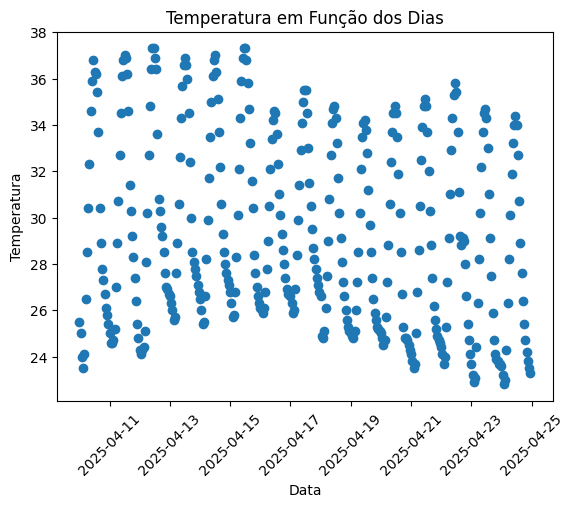

In [11]:
#### Escreva aqui a sua resposta
# !pip install matplotlib
import matplotlib.pyplot as plt


plt.scatter(y=dados.hourly.temperature_2m, x=dados.hourly.time)
plt.title("Temperatura em Função dos Dias")
plt.ylabel("Temperatura", )
plt.xticks(rotation = 45)
plt.xlabel("Data")
plt.show()